# Aluminio

In [402]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_Al_tren_2205.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)

['fss_0250kHz', 'fss_0340kHz', 'fss_0500kHz', 'fss_0640kHz', 'fss_0840kHz', 'fss_1000kHz', 'fss_1200kHz']


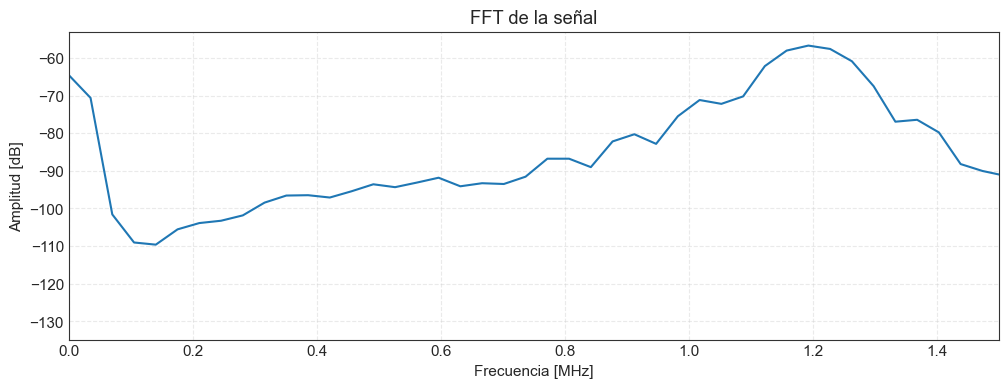

Mean frecuency max = 1192.87532 kHz.


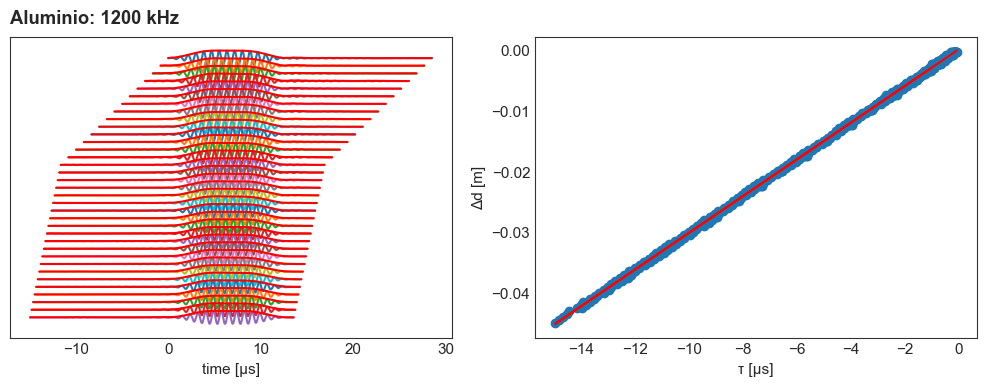

vg = 3014.26019 m/s; Intercept = 2e-05; r2 = 0.99968.


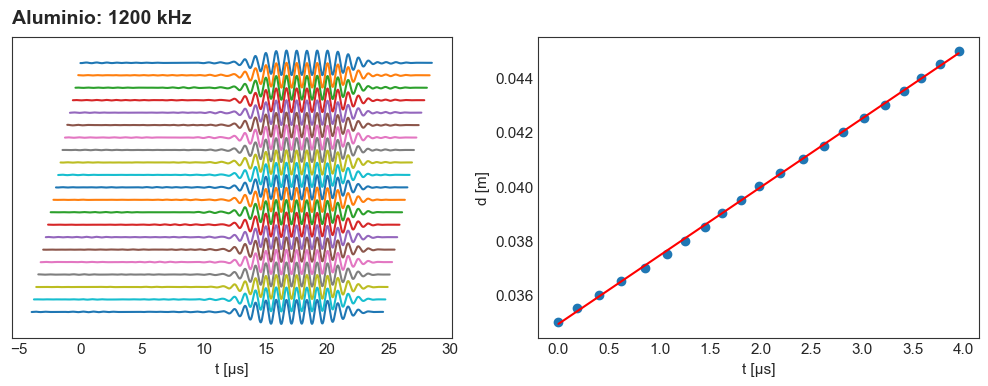

vf = 2520.99329 m/s; Intercept = 0.03493; r2 = 0.99951.


In [245]:
import importlib, lambmath
importlib.reload(lambmath)
from lambmath import full_analisis

fa = full_analisis(data_file["fss_1200kHz"], dist, bp_w = 400e3, round_to = 5, title = "Aluminio: 1200 kHz")

In [246]:
for name in names:
    print("-----------------------------------------------------------")
    full_analisis(data_file[name], dist, bp_w = 400e3, round_to = 5, plot = False)
print("-----------------------------------------------------------")

-----------------------------------------------------------
Mean frecuency max = 248.55281 kHz.
vg = 2710.13313 m/s; Intercept = 8e-05; r2 = 0.99929.
vf = 1659.05924 m/s; Intercept = 0.03496; r2 = 0.99978.
-----------------------------------------------------------
Mean frecuency max = 334.61326 kHz.
vg = 2792.27508 m/s; Intercept = 4e-05; r2 = 0.99934.
vf = 1828.31159 m/s; Intercept = 0.03495; r2 = 0.99979.
-----------------------------------------------------------
Mean frecuency max = 496.8372 kHz.
vg = 2950.14025 m/s; Intercept = 5e-05; r2 = 0.99981.
vf = 2068.6419 m/s; Intercept = 0.03497; r2 = 0.99986.
-----------------------------------------------------------
Mean frecuency max = 642.75918 kHz.
vg = 3001.28363 m/s; Intercept = 5e-05; r2 = 0.99979.
vf = 2206.34911 m/s; Intercept = 0.0349; r2 = 0.99968.
-----------------------------------------------------------
Mean frecuency max = 854.262 kHz.
vg = 3065.02762 m/s; Intercept = 2e-05; r2 = 0.99929.
vf = 2375.50054 m/s; Intercept 

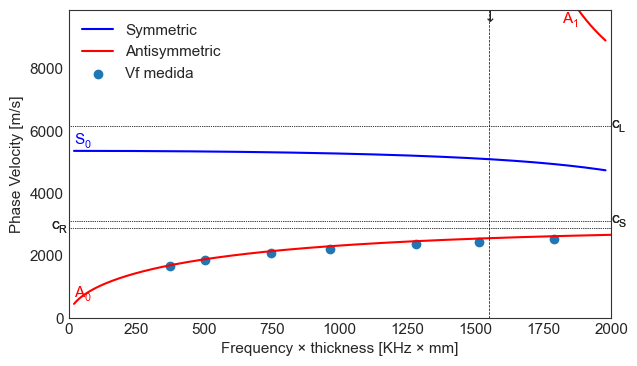

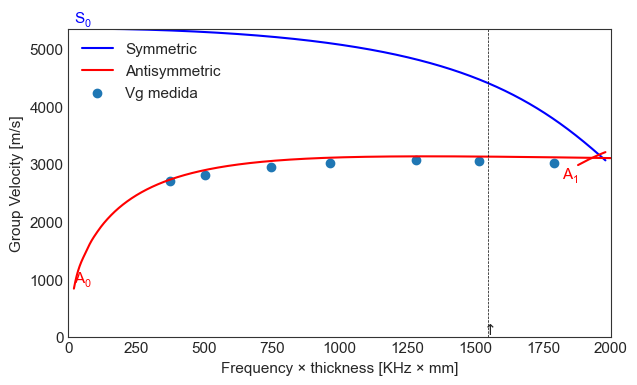

R²
Velocidad de fase:  0.9412
Velocidad de grupo: 0.5678 

coste -> ∑(y−ŷ)²/2
Velocidad de fase:  18312.43 m²/s²
Velocidad de grupo: 24011.44 m²/s²
Total: 42323.87 m²/s²


In [247]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import warnings
from lambmath import full_analisis, max_frecuency, wave_speeds
from lambwaves import Lamb


data_file = loadmat('erik/test_Al_tren_2205.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3

roundto = 5
b = 1.5 # solar cell Thickness mm
names_new = names
all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names_new)):
    data_in = data_file[names_new[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = 68.9e9          # E = Young's modulus, in Pa.
p = 2700            # p = Density (rho), in kg/m3.
v = 0.33            # v = Poisson's ratio (nu).

c_L, c_S, c_R = wave_speeds(E, v, p)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    alum = Lamb(thickness= b, #en mm
                nmodes_sym=3, 
                nmodes_antisym=3,
                fd_max=2000, 
                vp_max=10000, 
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminium')

# Plot phase velocity, group velocity and wavenumber.

alum.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

alum.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()


def r_squared(frb, v_exp, model):
    v_pred = model(frb)

    ss_1 = np.sum((v_exp - v_pred)**2)
    ss_2 = np.sum((v_exp - v_exp.mean())**2)

    return 1 - ss_1/ss_2


def r_cost(frb, v_exp, model):
    v_pred = model(frb)

    ss_1 = np.sum((v_exp - v_pred)**2)

    return 0.5*ss_1

print("R²")
print("Velocidad de fase: ", round(r_squared(frb, vfs, alum.vp_antisym['A0']), 4))
print("Velocidad de grupo:", round(r_squared(frb, vgs, alum.vg_antisym['A0']), 4), "\n")

print("coste -> ∑(y−ŷ)²/2")
print("Velocidad de fase: ", round(r_cost(frb, vfs, alum.vp_antisym['A0']), 2), "m²/s²")
print("Velocidad de grupo:", round(r_cost(frb, vgs, alum.vg_antisym['A0']), 2), "m²/s²")
print("Total:", round(r_cost(frb, vfs, alum.vp_antisym['A0'])+r_cost(frb, vgs, alum.vg_antisym['A0']), 2), "m²/s²") 

E = 64.106 [GPa],  ν = 0.307


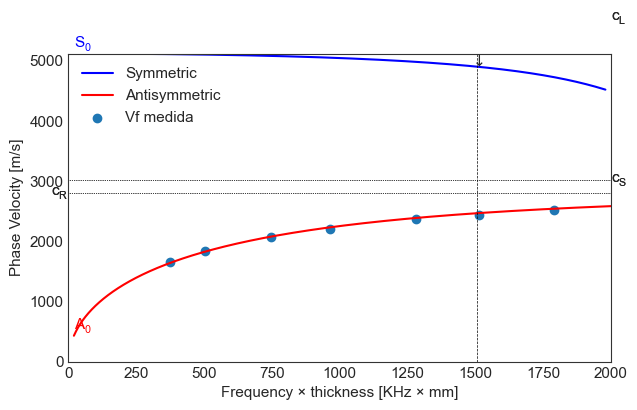

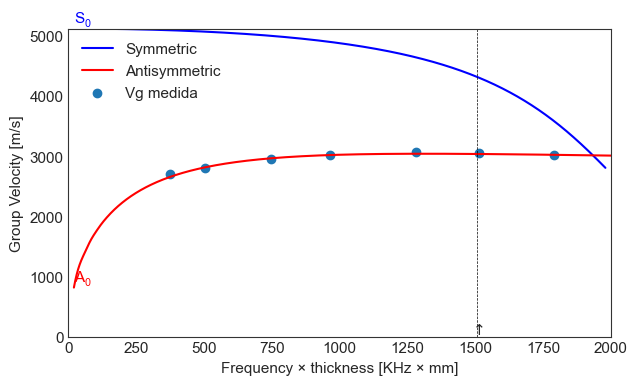

R²
Velocidad de fase:  0.9958
Velocidad de grupo: 0.9648 

coste -> ∑(y−ŷ)²/2
Velocidad de fase:  1318.24 m²/s²
Velocidad de grupo: 1956.64 m²/s²
Total: 3274.88 m²/s²


In [248]:
from scipy.io import loadmat
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

data_file = loadmat('erik/test_Al_tren_2205.mat')
names = [i for i in data_file.keys()][3:]


roundto = 5
b = 1.5            #Thickness mm
p = 2700           #kg/m³
E0 = 69e9
v0 = 0.34
bounds = ([1e9, 0], [100e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2700          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        alum = Lamb(thickness= 1.5, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=2000, 
                    vp_max=10000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = alum.vp_antisym['A0'](x1) - y1       
    r2 = alum.vg_antisym['A0'](x2) - y2

    #return r1
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E, v, p)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    alum = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=2000, 
                vp_max=10000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

alum.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

alum.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()

print("R²")
print("Velocidad de fase: ", round(r_squared(frb, vfs, alum.vp_antisym['A0']), 4))
print("Velocidad de grupo:", round(r_squared(frb, vgs, alum.vg_antisym['A0']), 4), "\n")

print("coste -> ∑(y−ŷ)²/2")
print("Velocidad de fase: ", round(r_cost(frb, vfs, alum.vp_antisym['A0']), 2), "m²/s²")
print("Velocidad de grupo:", round(r_cost(frb, vgs, alum.vg_antisym['A0']), 2), "m²/s²")
print("Total:", round(r_cost(frb, vfs, alum.vp_antisym['A0'])+r_cost(frb, vgs, alum.vg_antisym['A0']), 2), "m²/s²") 

In [249]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings
from tqdm import tqdm

# Comprobar la fiabilidad del resultado haciendo más repeticiones desde puntos de inicio distintos

roundto = 5
bounds = ([1e9, 0], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in tqdm(range(10)):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(-1, 1)

    E0 = 69e9 + r*60e9
    v0 = 0.34

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2700          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)

        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            alum = Lamb(thickness= 1.5, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=2000, 
                        vp_max=10000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = alum.vp_antisym['A0'](x1) - y1       
        r2 = alum.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", round(E.min(), 2),"--", round(E.max(), 2),"GPa")
print("v =", round(v.min(), 4),"--", round(v.max(), 4))
print("E =", round(E_c, 2),"±", round(E_er, 2), "GPa")
print("v =", round(v_c, 4),"±", round(v_er, 4))

100%|██████████| 10/10 [03:30<00:00, 21.07s/it]

E = 64.11 -- 64.11 GPa
v = 0.3067 -- 0.3067
E = 64.11 ± 0.0 GPa
v = 0.3067 ± 0.0


In [250]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings


# Como varía el resultado con el error del espesor de la placa

roundto = 5
bounds = ([1e9, 0], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

E0 = 69e9
v0 = 0.34

for i in [-0.1, 0, 0.1]:

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2700          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)

        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            alum = Lamb(thickness= 1.5 + i, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=2000, 
                        vp_max=10000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = alum.vp_antisym['A0'](x1) - y1       
        r2 = alum.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = (E.mean(), (E.max() - E.min())/2)
v_c, v_er = (v.mean(), (v.max() - v.min())/2)

print("E =", E_c,"±", E_er)
print("v =", v_c,"±", v_er)

E = 64.10585442937771 ± 2.459492279172082e-05
v = 0.30672190888866235 ± 9.949779895823685e-07


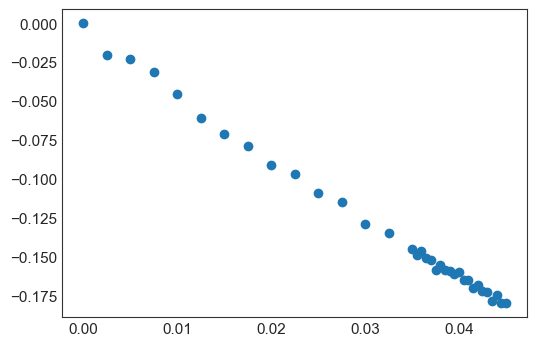

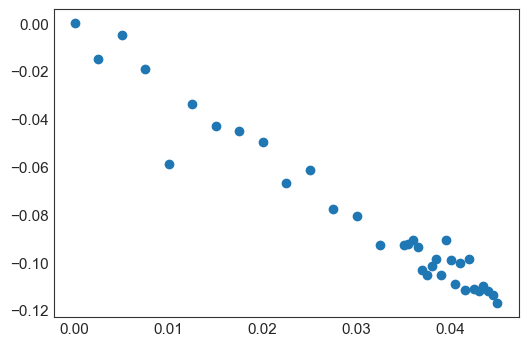

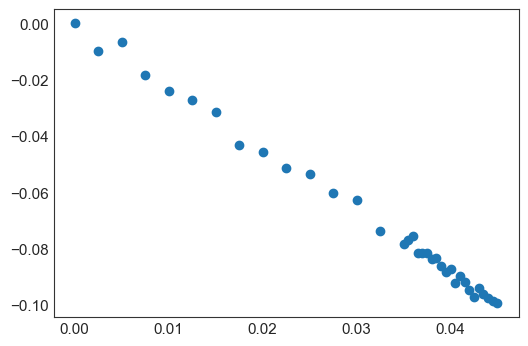

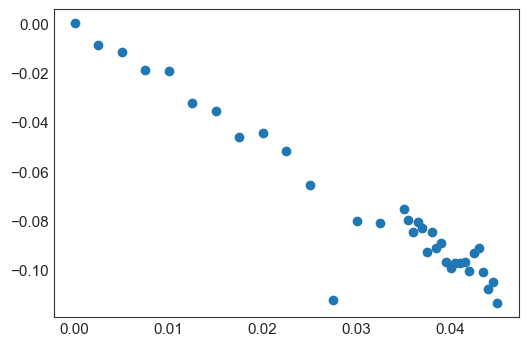

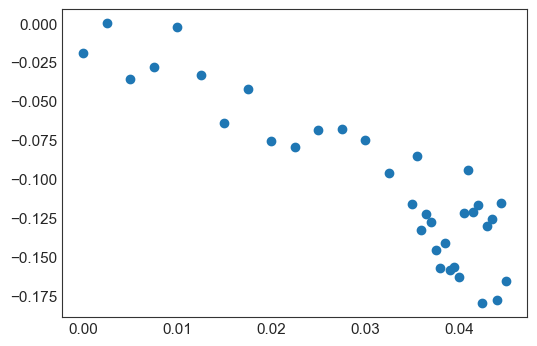

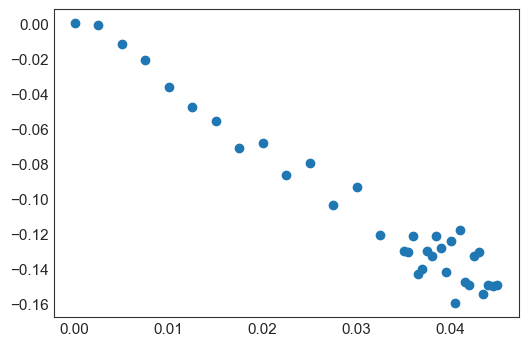

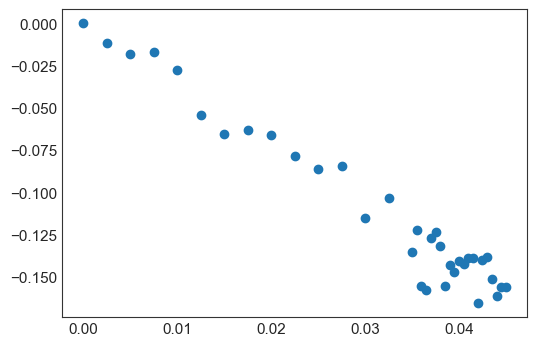

[-3.878 -2.438 -2.193 -2.298 -3.368 -3.397 -3.562]
[0.996 0.956 0.995 0.923 0.818 0.958 0.955]


In [251]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []

all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i])
    lr = linregress(dist, np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

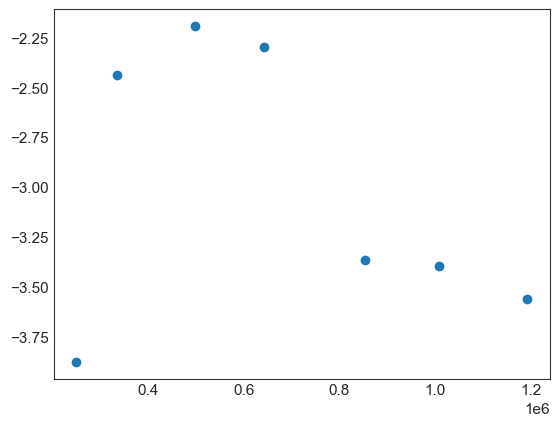

In [252]:
fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)

# Primer test en célula solar

In [253]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test0_celula_solar.mat')
names = [i for i in data_file.keys()][4:]

print(names)

['ss_1MHz', 'ss_1MHz_serie2a', 'ss_1MHz_serie2b', 'ss_250kHz', 'ss_250kHz_b', 'ss_400kHz', 'ss_400kHz_b', 'ss_500kHz', 'ss_500kHz_2', 'ss_500kHz_2b', 'ss_650kHz', 'ss_650kHz_3', 'ss_650kHz_4', 'ss_650kHz_5', 'ss_650kHz_6', 'ss_650kHz_bis', 'ss_650kHz_bis_2', 'ss_650kHz_quad', 'ss_650kHz_quad_400kHz', 'ss_650kHz_serie2a', 'ss_650kHz_serie2b']


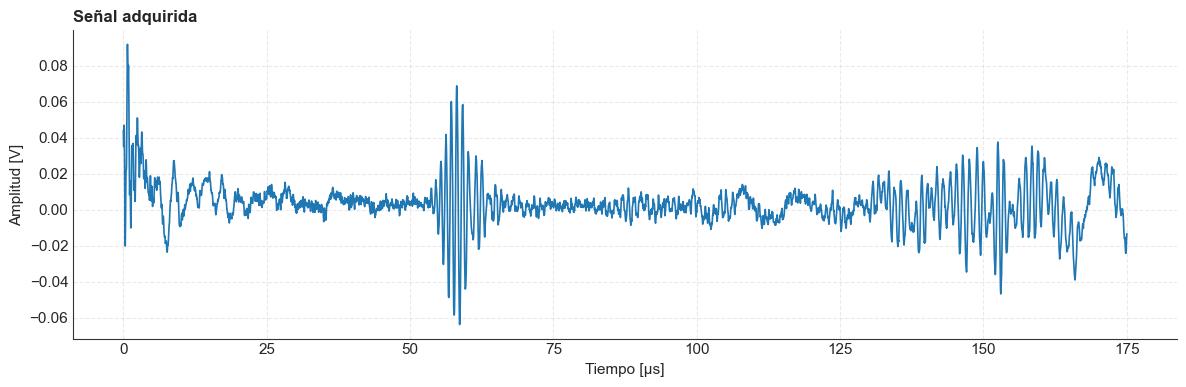

In [254]:
import numpy as np
import matplotlib.pyplot as plt

n = 0

t  = data_file[names[n]].T[0]
y  = data_file[names[n]].T[1]

t_us = t * 1e6

plt.style.use('seaborn-v0_8-white')  
plt.rcParams.update({
    'font.size':      11,
    'axes.edgecolor': '#333',
    'axes.linewidth': 0.8,
    'grid.color':     '#cccccc',
    'grid.linestyle': '--',
    'grid.alpha':     0.4,
})

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(t_us, y,
        lw=1.2,
        color='tab:blue')

ax.set_xlabel('Tiempo [µs]')
ax.set_ylabel('Amplitud [V]')
ax.set_title('Señal adquirida', loc='left', fontweight='bold', fontsize=12)

ax.grid(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

plt.show()


# Célula tipo p

## Pulso de banda ancha

In [318]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test3_cs_0805_inv.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)

['fss_0250kHz_inv', 'fss_0340kHz_inv', 'fss_0510kHz_inv', 'fss_0640kHz_inv', 'fss_0830kHz_inv', 'fss_1000KHz_inv', 'fss_1200kHz_inv_05us', 'fss_1200kHz_inv_10us']


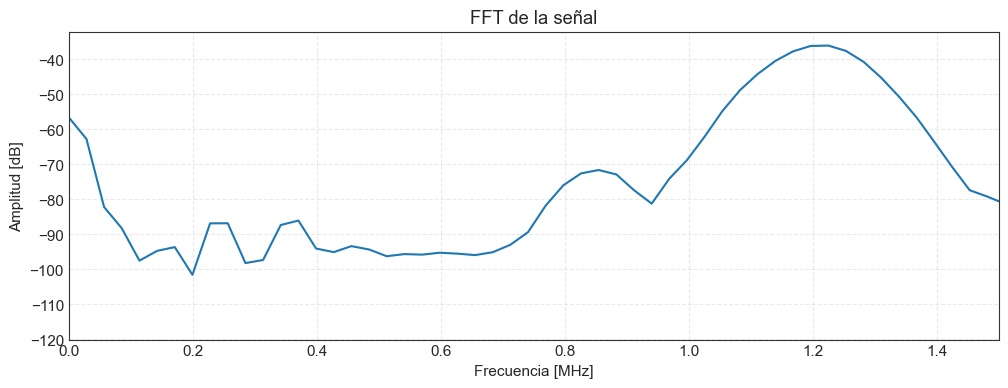

Mean frecuency max = 1225.0623 kHz.


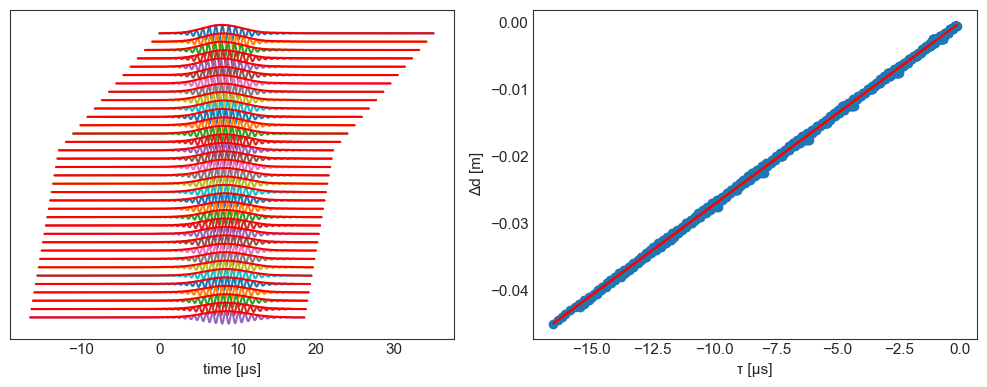

vg = 2720.7213 m/s; Intercept = 0.0; r2 = 0.9996.


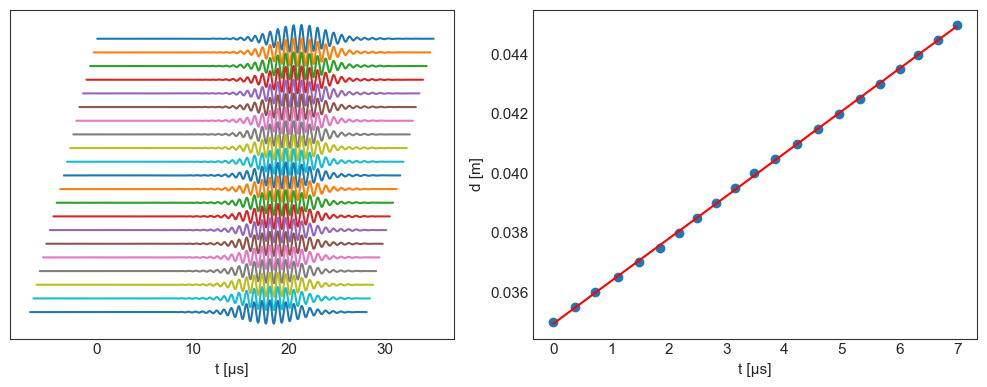

vf = 1433.4174 m/s; Intercept = 0.0349; r2 = 0.9998.


In [319]:
import importlib, lambmath         # primera importación
importlib.reload(lambmath)

from lambmath import full_analisis, cc_group_velocity_all

fa = full_analisis(data_file["fss_1200kHz_inv_05us"], dist, bp_w = 400e3)

In [320]:
names = ['fss_0250kHz_inv', 'fss_0340kHz_inv', 'fss_0510kHz_inv', 'fss_0640kHz_inv', 'fss_0830kHz_inv', 'fss_1000KHz_inv', 'fss_1200kHz_inv_05us']

In [321]:
from lambmath import cc_group_velocity, cc_group_velocity_all, threshold_group_velocity, threshold_group_velocity_all

all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])
f_group_all = (cc_group_velocity, cc_group_velocity_all, threshold_group_velocity, threshold_group_velocity_all)
vgs = [[], [], [], []]

for j in range(len(f_group_all)):
    for i in range(len(names)):
        vgs[j].append(f_group_all[j](data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False))

vgs = np.array(vgs)

In [322]:
r2_sum = np.sum(vgs[:, :, 2], axis = 1)

print(r2_sum)
print(f_group_all[np.argmax(r2_sum)])

# En casos donde la relación señal ruido aumenta rapidamente, calcular el retardo entre más puntos a mayor distancia puede ser contraproducente.

[6.99869148 6.99699052 6.99786344 6.99483549]
<function cc_group_velocity at 0x000002032CB4B060>


E = 15.646 [GPa],  ν = -0.869
4932.952968922271


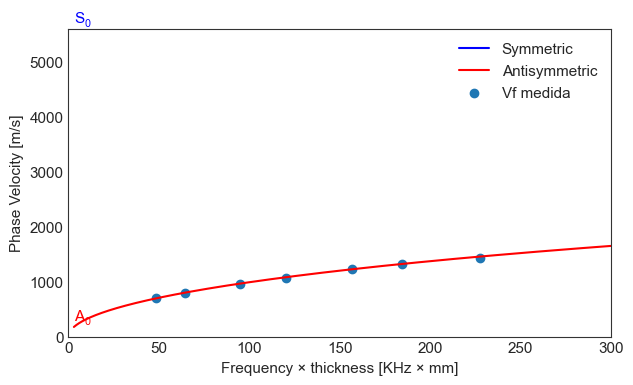

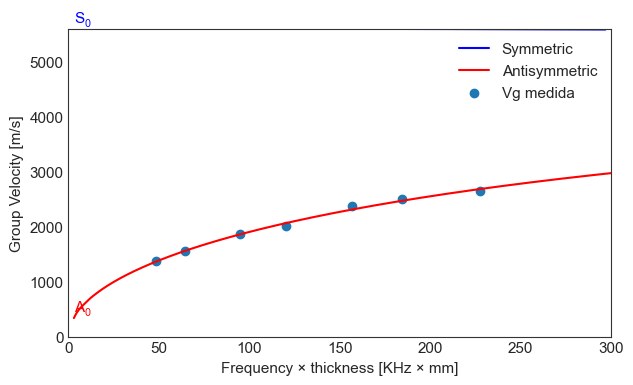

R²
Velocidad de fase:  0.9981
Velocidad de grupo: 0.9936 

coste -> ∑(y−ŷ)²/2
Velocidad de fase:  406.86 m²/s²
Velocidad de grupo: 4526.08 m²/s²
Total: 4932.94 m²/s²


In [323]:
import numpy as np
from lambmath import full_analisis, max_frecuency, wave_speeds, cc_group_velocity
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.186          #Thickness mm
p = 2033           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([1e9, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 200e3, 200e3, 300e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n], f_group_velocity=cc_group_velocity,
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2033          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        cell = Lamb(thickness= 0.186, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=400, 
                    vp_max=15000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = cell.vp_antisym['A0'](x1) - y1       
    r2 = cell.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E_fit, v_fit, p)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    cell = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=300, 
                vp_max=15000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

cell.plot_phase_velocity(material_velocities = False)
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

cell.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

print("R²")
print("Velocidad de fase: ", round(r_squared(frb, vfs, cell.vp_antisym['A0']), 4))
print("Velocidad de grupo:", round(r_squared(frb, vgs, cell.vg_antisym['A0']), 4), "\n")

print("coste -> ∑(y−ŷ)²/2")
print("Velocidad de fase: ", round(r_cost(frb, vfs, cell.vp_antisym['A0']), 2), "m²/s²")
print("Velocidad de grupo:", round(r_cost(frb, vgs, cell.vg_antisym['A0']), 2), "m²/s²")
print("Total:", round(r_cost(frb, vfs, cell.vp_antisym['A0'])+r_cost(frb, vgs, cell.vg_antisym['A0']), 2), "m²/s²") 

In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings
from tqdm import tqdm

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.186 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 200e3, 200e3, 300e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n], 
                             bp_w = all_bp_width[n], round_to = roundto, 
                             plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in tqdm(range(10)):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(-1, 1)

    E0 = 100e9 + r*60e9
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2033          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            cell = Lamb(thickness= 0.186, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = cell.vp_antisym['A0'](x1) - y1       
        r2 = cell.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", round(E.min(), 2),"--", round(E.max(), 2),"GPa")
print("v =", round(v.min(), 4),"--", round(v.max(), 4))
print("E =", round(E_c, 2),"±", round(E_er, 2), "GPa")
print("v =", round(v_c, 4),"±", round(v_er, 4))


100%|██████████| 10/10 [21:02:31<00:00, 7575.16s/it]   

E = 9.97 -- 77.95 GPa
v = -0.9211 -- 0.0818
E = 26.24 ± 33.99 GPa
v = -0.7007 ± 0.5014


In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings


# Como varía el resultado con el error del espesor de la placa

roundto = 5
bounds = ([1e9, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

E0 = 100e9
v0 = 0.3

for i in [-0.002, 0.002]:

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2033          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            cell = Lamb(thickness= 0.186 + i, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Célula N')

        r1 = cell.vp_antisym['A0'](x1) - y1       
        r2 = cell.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", E_c,"±", E_er)
print("v =", v_c,"±", v_er)


E = 6.043513458715447 ± 1.077748197866092
v = -0.9549058571427322 ± 0.008206571724083622


[-2.002 -2.018 -2.423 -2.826 -2.717 -1.241 -5.14 ]
[0.699 0.941 0.958 0.879 0.828 0.467 0.791]


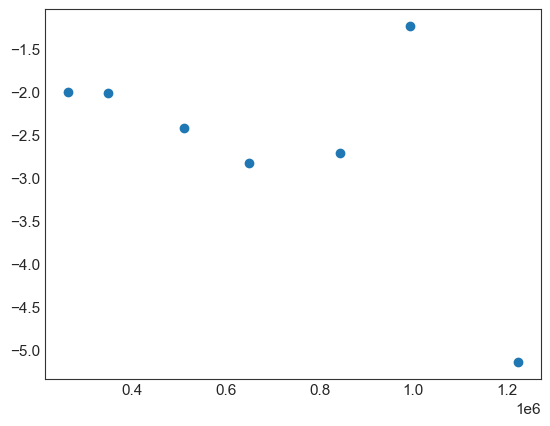

In [261]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 200e3, 200e3, 300e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False)
    lr = linregress(dist, np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)
plt.show()

## tren de ondas

In [281]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_tren_1405.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)

['fss_0250kHz_Tren_1', 'fss_0340kHz_Tren_1', 'fss_0500kHz_Tren_1', 'fss_0640kHz_Tren_1', 'fss_0800kHz_Tren_1', 'fss_1000kHz_Tren_1', 'fss_1200kHz_Tren_3']


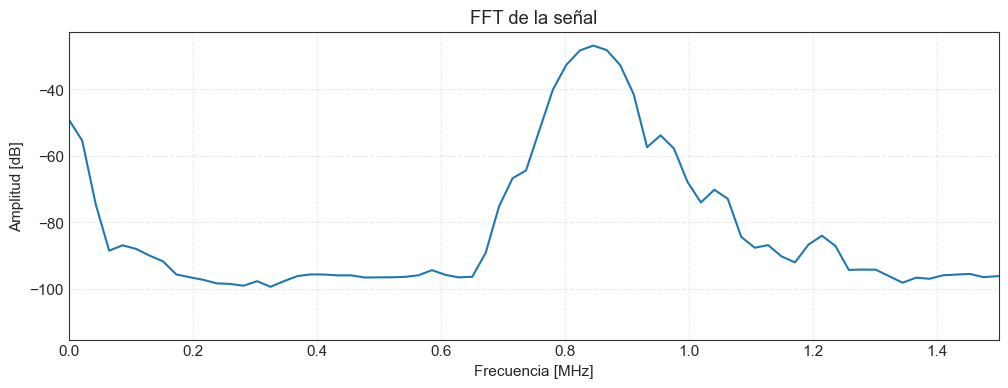

Mean frecuency max = 845.9745 kHz.


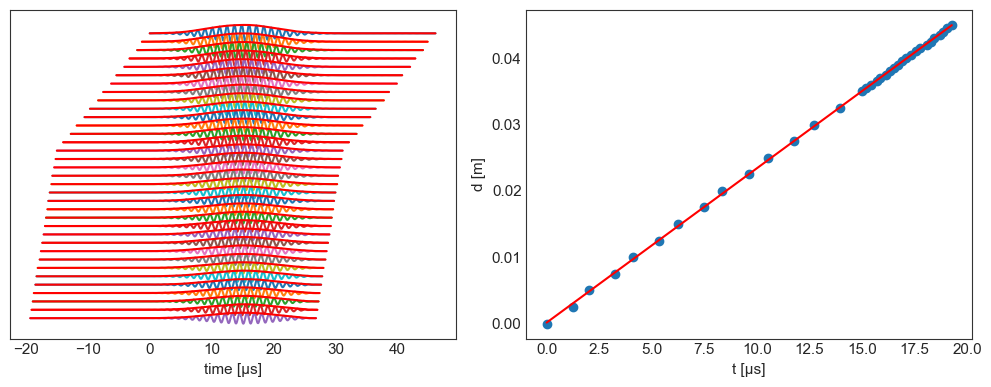

vg = 2324.5025 m/s; Intercept = 0.0002; r2 = 0.9998.


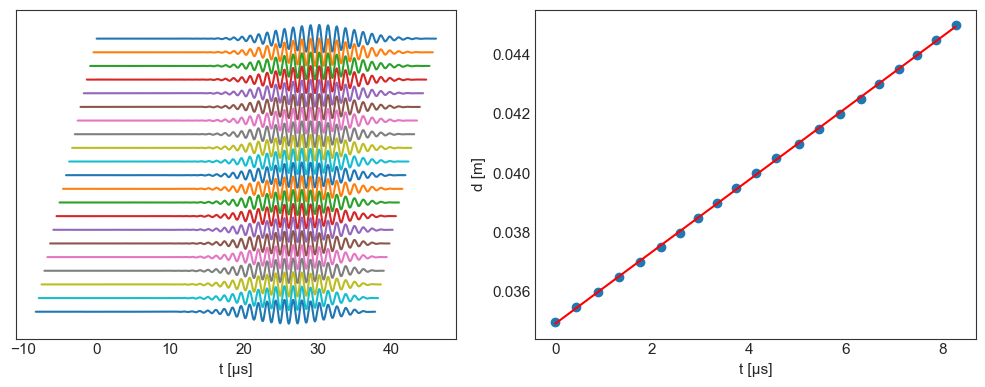

vf = 1210.7578 m/s; Intercept = 0.0349; r2 = 0.9998.


In [310]:
import importlib, lambmath
importlib.reload(lambmath)

from lambmath import full_analisis, cc_group_velocity, threshold_group_velocity, cc_group_velocity_all, threshold_group_velocity_all

fa = full_analisis(data_file[names[4]], dist, f_group_velocity = cc_group_velocity, bp_w = 400e3)

In [283]:
from lambmath import cc_group_velocity_all

all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])

for i in range(len(names)):
    print("-----------------------------------------------------------")
    full_analisis(data_file[names[i]], dist, f_group_velocity= cc_group_velocity_all, bp_w = all_bp_width[i], round_to = 5, plot = False)
print("-----------------------------------------------------------")

-----------------------------------------------------------
Mean frecuency max = 252.09216 kHz.
vg = 1329.37924 m/s; Intercept = -0.0; r2 = 0.99981.
vf = 683.76722 m/s; Intercept = 0.03496; r2 = 0.99991.
-----------------------------------------------------------
Mean frecuency max = 339.57349 kHz.
vg = 1574.08271 m/s; Intercept = 3e-05; r2 = 0.99937.
vf = 799.42481 m/s; Intercept = 0.03494; r2 = 0.99984.
-----------------------------------------------------------
Mean frecuency max = 499.31093 kHz.
vg = 1875.54516 m/s; Intercept = 3e-05; r2 = 0.99972.
vf = 961.2404 m/s; Intercept = 0.03495; r2 = 0.99988.
-----------------------------------------------------------
Mean frecuency max = 644.12706 kHz.
vg = 2102.87154 m/s; Intercept = 6e-05; r2 = 0.99939.
vf = 1195.97984 m/s; Intercept = 0.0351; r2 = 0.99204.
-----------------------------------------------------------
Mean frecuency max = 845.97446 kHz.
vg = 2326.23886 m/s; Intercept = 4e-05; r2 = 0.99946.
vf = 1210.75784 m/s; Intercept =

In [306]:
from lambmath import cc_group_velocity, cc_group_velocity_all, threshold_group_velocity, threshold_group_velocity_all

all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])
f_group_all = (cc_group_velocity, cc_group_velocity_all, threshold_group_velocity, threshold_group_velocity_all)
vgs = [[], [], [], []]

for j in range(len(f_group_all)):
    for i in range(len(names)):
        vgs[j].append(f_group_all[j](data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False))

vgs = np.array(vgs)

In [ ]:
r2_sum = np.sum(vgs[:, :, 2], axis = 1)

print(r2_sum)
print(f_group_all[np.argmax(r2_sum)])

# En casos donde la relación señal ruido aumenta rapidamente, calcular el retardo entre más puntos a mayor distancia puede ser contraproducente.

[6.99847042 6.99627295 6.99826349 6.99584908]
<function cc_group_velocity at 0x000002031D6AA160>


E = 67.134 [GPa],  ν = -0.157
15014.41055312008


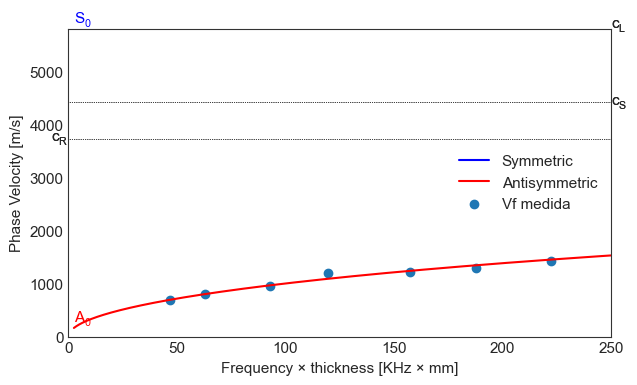

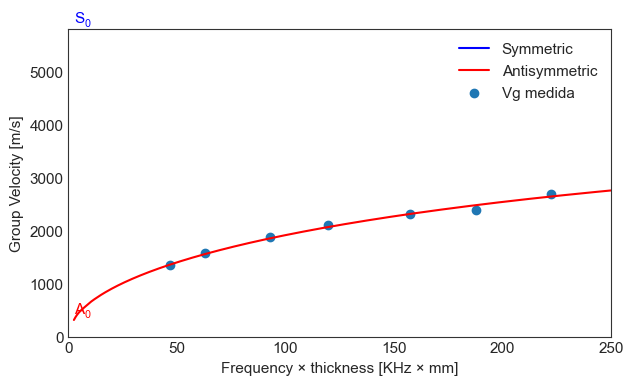

R²
Velocidad de fase:  0.9653
Velocidad de grupo: 0.9895 

coste -> ∑(y−ŷ)²/2
Velocidad de fase:  7806.61 m²/s²
Velocidad de grupo: 7207.82 m²/s²
Total: 15014.43 m²/s²


In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency, threshold_group_velocity, cc_group_velocity
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings

names1 = ['fss_0250kHz_Tren_1', 'fss_0340kHz_Tren_1', 'fss_0500kHz_Tren_1', 'fss_0640kHz_Tren_1', 'fss_0800kHz_Tren_1', 'fss_1000kHz_Tren_1', 'fss_1200kHz_Tren_3']
#---------------------------------------------------------------------------------

roundto = 5
b = 0.186          #Thickness mm
p = 2033           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([5e8, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, f_group_velocity = cc_group_velocity, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2033          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        cell = Lamb(thickness= 0.186, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=400, 
                    vp_max=10000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = cell.vp_antisym['A0'](x1) - y1       
    r2 = cell.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E_fit, v_fit, p)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    cell = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=250, 
                vp_max=10000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

cell.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

cell.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

print("R²")
print("Velocidad de fase: ", round(r_squared(frb, vfs, cell.vp_antisym['A0']), 4))
print("Velocidad de grupo:", round(r_squared(frb, vgs, cell.vg_antisym['A0']), 4), "\n")

print("coste -> ∑(y−ŷ)²/2")
print("Velocidad de fase: ", round(r_cost(frb, vfs, cell.vp_antisym['A0']), 2), "m²/s²")
print("Velocidad de grupo:", round(r_cost(frb, vgs, cell.vg_antisym['A0']), 2), "m²/s²")
print("Total:", round(r_cost(frb, vfs, cell.vp_antisym['A0'])+r_cost(frb, vgs, cell.vg_antisym['A0']), 2), "m²/s²") 

In [311]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings
from tqdm import tqdm

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.186 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, f_group_velocity = cc_group_velocity, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in tqdm(range(10)):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(-1, 1)

    E0 = 100e9 + r*60e9
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2033          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            cell = Lamb(thickness= 0.186, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = cell.vp_antisym['A0'](x1) - y1       
        r2 = cell.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", round(E.min(), 2),"--", round(E.max(), 2),"GPa")
print("v =", round(v.min(), 4),"--", round(v.max(), 4))
print("E =", round(E_c, 2),"±", round(E_er, 2), "GPa")
print("v =", round(v_c, 4),"±", round(v_er, 4))

100%|██████████| 10/10 [06:03<00:00, 36.31s/it]

E = 67.15 -- 71.34 GPa
v = -0.1561 -- 0.0495
E = 69.25 ± 2.09 GPa
v = -0.0533 ± 0.1028


In [313]:
import numpy as np
from lambmath import full_analisis, max_frecuency, cc_group_velocity
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings


# Como varía el resultado con el error del espesor de la placa

roundto = 5
bounds = ([1e9, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, f_group_velocity = cc_group_velocity, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

E0 = 100e9
v0 = 0.3

for i in [-0.002, 0.002]:

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2033          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            cell = Lamb(thickness= 0.186 + i, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Célula P')

        r1 = cell.vp_antisym['A0'](x1) - y1       
        r2 = cell.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", round(E.min(), 2),"--", round(E.max(), 2),"GPa")
print("v =", round(v.min(), 4),"--", round(v.max(), 4))
print("E =", round(E_c, 2),"±", round(E_er, 2), "GPa")
print("v =", round(v_c, 4),"±", round(v_er, 4))

E = 67.05 -- 67.15 GPa
v = -0.1593 -- -0.1561
E = 67.1 ± 0.05 GPa
v = -0.1577 ± 0.0016


[-1.392 -1.271 -2.345 -0.039 -9.782 -3.058 -8.224]
[0.956 0.836 0.974 0.    0.978 0.81  0.945]


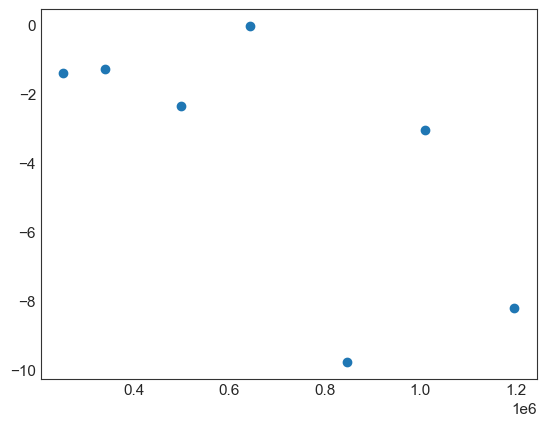

In [268]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3, 200e3, 400e3, 400e3, 400e3, 400e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False)
    lr = linregress(dist, np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)
plt.show()

# Célula tipo n

In [326]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_n_tren_2305.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)
print(data_file[names[0]].shape)

['fss_0250kHz', 'fss_0350kHz', 'fss_0500kHz', 'fss_0640kHz', 'fss_0840kHz', 'fss_1000kHz', 'fss_1200kHz']
(6534, 36)


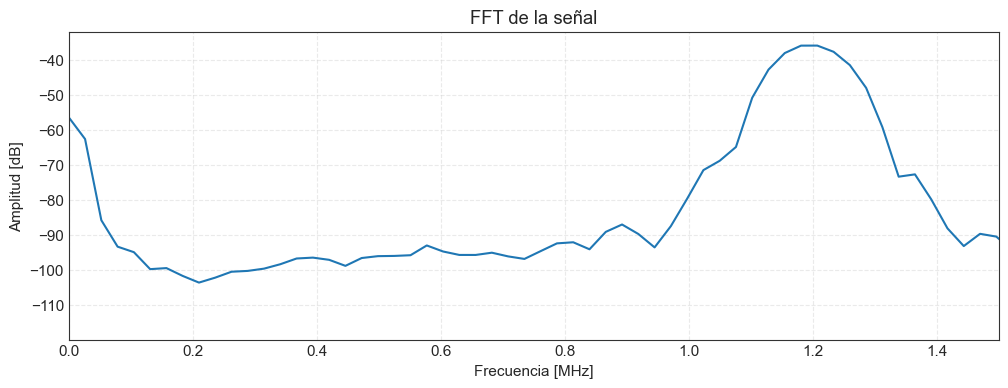

Mean frecuency max = 1207.3004 kHz.


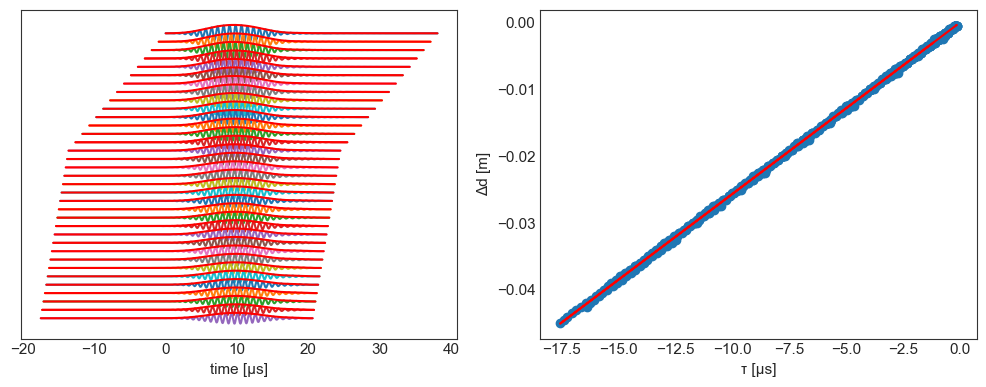

vg = 2571.9502 m/s; Intercept = 0.0; r2 = 0.9998.


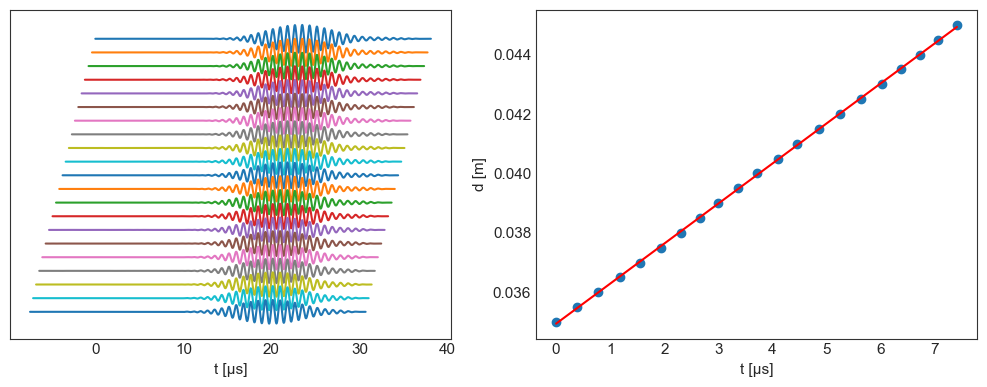

vf = 1348.0571 m/s; Intercept = 0.0349; r2 = 0.9998.


In [270]:
import importlib, lambmath
importlib.reload(lambmath)

from lambmath import full_analisis

fa = full_analisis(data_file[names[6]], dist, bp_w = 400e3)

E = 98.055 [GPa],  ν = 0.15
5237.285378911505


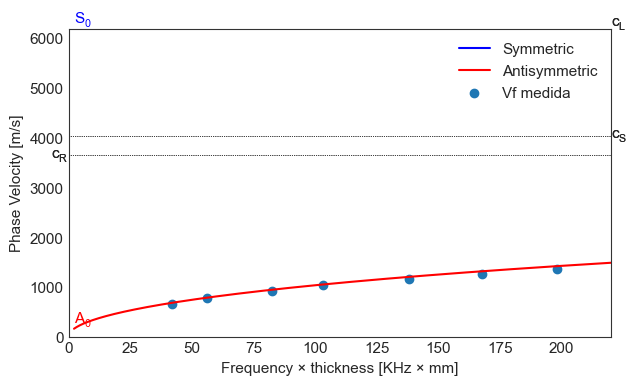

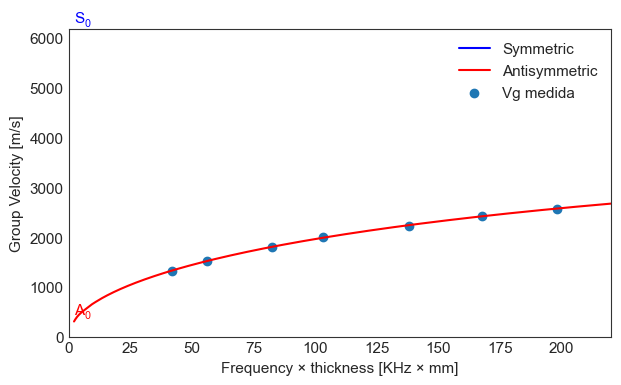

R²
Velocidad de fase:  0.9747
Velocidad de grupo: 0.9994 

coste -> ∑(y−ŷ)²/2
Velocidad de fase:  4869.73 m²/s²
Velocidad de grupo: 367.36 m²/s²
Total: 5237.09 m²/s²


In [271]:
import numpy as np
from lambmath import full_analisis, max_frecuency, wave_speeds
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.164            #Thickness mm
p = 2620.5           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([5e8, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    #vgs.append(threshold_group_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2620.5          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        cell = Lamb(thickness= 0.164, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=500, 
                    vp_max=15000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = cell.vp_antisym['A0'](x1) - y1       
    r2 = cell.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)

result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E, v, p)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    cell = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=220, 
                vp_max=7000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

cell.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

cell.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()


print("R²")
print("Velocidad de fase: ", round(r_squared(frb, vfs, cell.vp_antisym['A0']), 4))
print("Velocidad de grupo:", round(r_squared(frb, vgs, cell.vg_antisym['A0']), 4), "\n")

print("coste -> ∑(y−ŷ)²/2")
print("Velocidad de fase: ", round(r_cost(frb, vfs, cell.vp_antisym['A0']), 2), "m²/s²")
print("Velocidad de grupo:", round(r_cost(frb, vgs, cell.vg_antisym['A0']), 2), "m²/s²")
print("Total:", round(r_cost(frb, vfs, cell.vp_antisym['A0'])+r_cost(frb, vgs, cell.vg_antisym['A0']), 2), "m²/s²") 

In [272]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings
from tqdm import tqdm

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.164 
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in tqdm(range(10)):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(-1, 1)

    E0 = 100e9 + r*60e9
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2620.5          #kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 0.164, #mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1 
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", round(E.min(), 2),"--", round(E.max(), 2),"GPa")
print("v =", round(v.min(), 4),"--", round(v.max(), 4))
print("E =", round(E_c, 2),"±", round(E_er, 2), "GPa")
print("v =", round(v_c, 4),"±", round(v_er, 4))

100%|██████████| 10/10 [05:32<00:00, 33.23s/it]

E = 76.05 -- 96.27 GPa
v = -0.4036 -- -0.0364
E = 86.16 ± 10.11 GPa
v = -0.22 ± 0.1836


In [273]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings


# Como varía el resultado con el error del espesor de la placa

roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

E0 = 100e9
v0 = 0.3

for i in [-0.002, 0.002]:

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2620.5          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            cell = Lamb(thickness= 0.164 + i, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Célula N')

        r1 = cell.vp_antisym['A0'](x1) - y1       
        r2 = cell.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E_c, E_er = ((E.max() + E.min())/2, (E.max() - E.min())/2)
v_c, v_er = ((v.max() + v.min())/2, (v.max() - v.min())/2)

print("E =", E_c,"±", E_er)
print("v =", v_c,"±", v_er)

E = 98.05776641536747 ± 0.0009584460532323646
v = 0.15001733051560606 ± 4.834100794919027e-05


[-2.144 -3.59  -3.048 -5.607 -3.792 -6.686 -9.896]
[0.978 0.969 0.927 0.989 0.932 0.987 0.978]


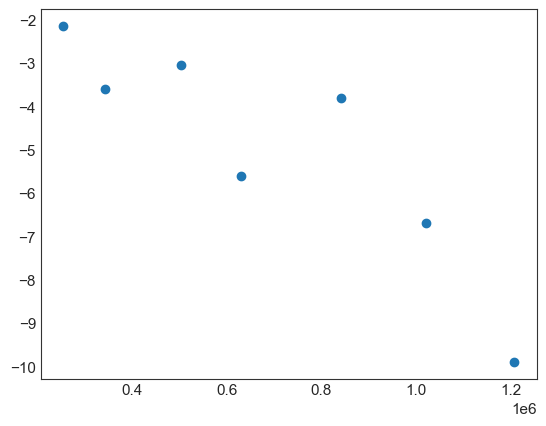

In [274]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False)
    lr = linregress(dist, np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)
plt.show()

# testing group_velocity Methods

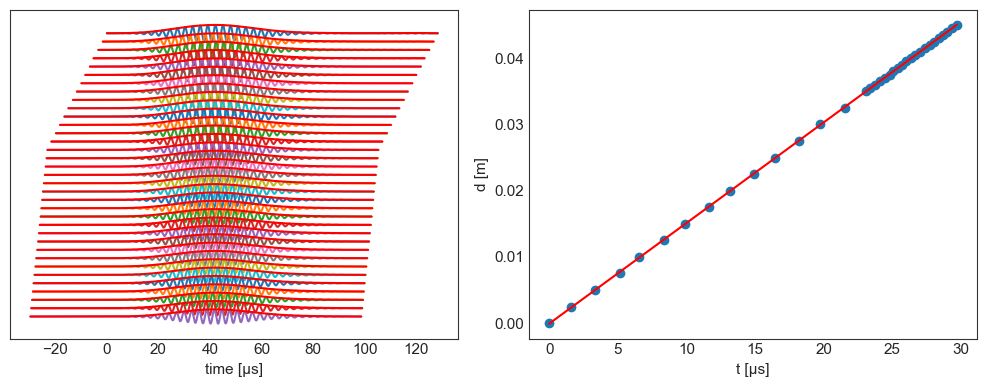

[ 1.51867714e+03 -7.07771671e-05  9.99964846e-01]


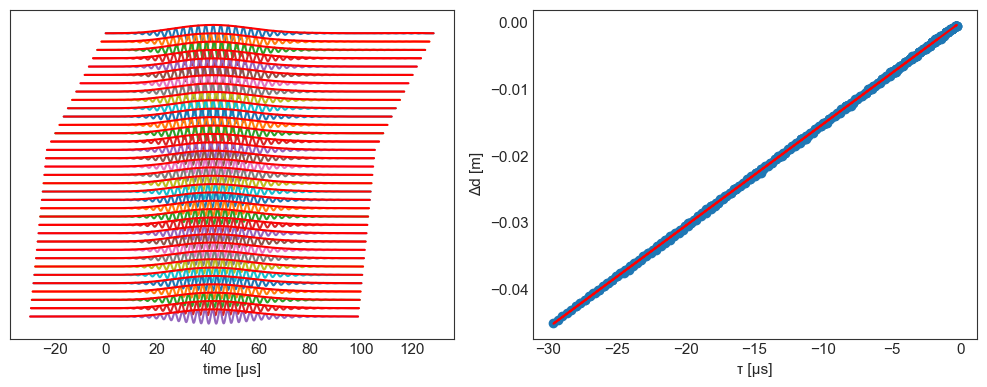

[1.52183817e+03 1.88330546e-05 9.99907162e-01]


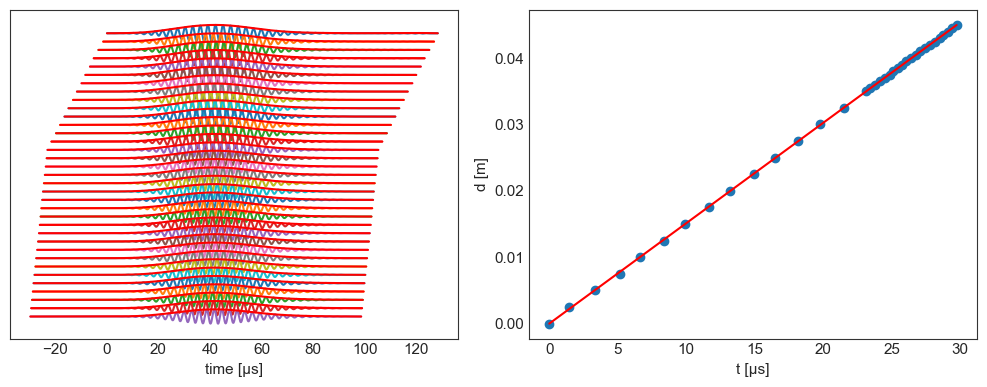

[ 1.51354069e+03 -1.71931841e-05  9.99953329e-01]


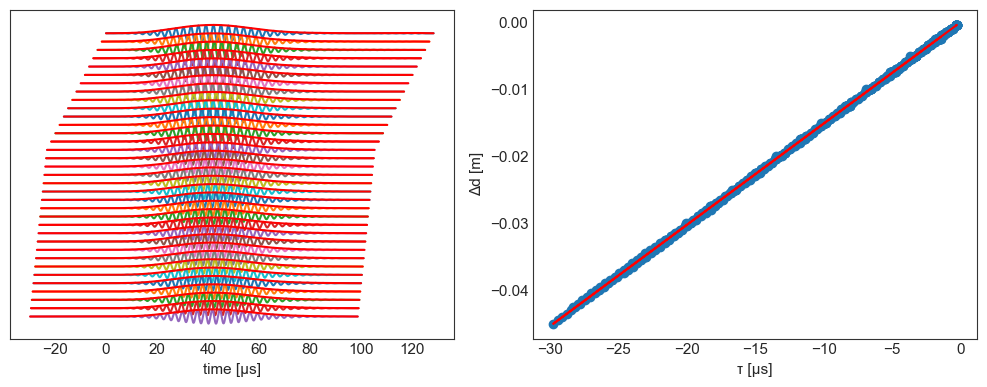

[1.51380084e+03 4.29810207e-06 9.99884122e-01]


In [275]:
import importlib, lambmath
importlib.reload(lambmath)
from lambmath import cc_group_velocity, cc_group_velocity_all, threshold_group_velocity, threshold_group_velocity_all, max_frecuency

print(           cc_group_velocity(data_file[names[1]], dist, plot = True, bp_w = 200e3))
print(       cc_group_velocity_all(data_file[names[1]], dist, plot = True, bp_w = 200e3))
print(    threshold_group_velocity(data_file[names[1]], dist, plot = True, bp_w = 200e3))
print(threshold_group_velocity_all(data_file[names[1]], dist, plot = True, bp_w = 200e3))

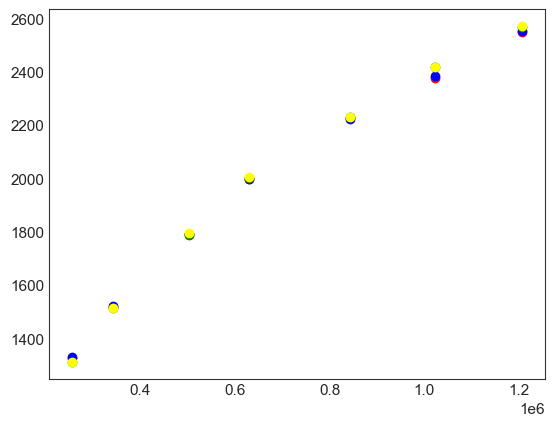

In [276]:
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])

vgmx = []
fc = []

colors = ["red", "blue", "green", "yellow"]

for i in range(len(names)):
    v = []

    fc.append(max_frecuency(data_file[names[i]]))
    v.append(cc_group_velocity(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))
    v.append(cc_group_velocity_all(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))
    v.append(threshold_group_velocity(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))
    v.append(threshold_group_velocity_all(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))

    vgmx.append(v)
vgmx = np.array(vgmx)

for i in range(len(names)): 
    for j in range(4):
        plt.scatter(fc[i], vgmx[i][j][0], c = colors[j])
plt.show()

E = 98.057 [GPa],  ν = 0.15
5238.2762234609245


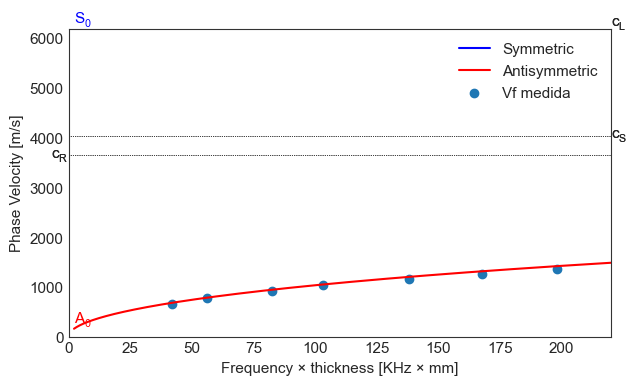

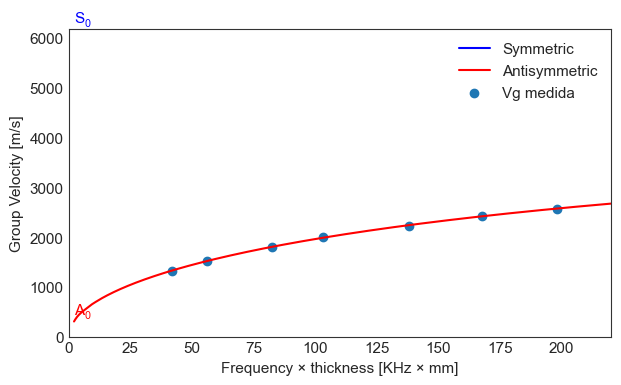

In [278]:
import numpy as np
from lambmath import cc_phase_velocity, threshold_group_velocity_all, max_frecuency, wave_speeds
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.164            #Thickness mm
p = 2620.5           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([1e9, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    vgs.append(threshold_group_velocity_all(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(cc_phase_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2620.5          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        pol = Lamb(thickness= 0.164, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=500, 
                    vp_max=15000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = pol.vp_antisym['A0'](x1) - y1       
    r2 = pol.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E, v, p)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    pol = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=220, 
                vp_max=7000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

pol.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

pol.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

In [280]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.164 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    vgs.append(threshold_group_velocity_all(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(cc_phase_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in range(20):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(0.1, 2)

    E0 = 100e9 * r
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2620.5          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 0.164, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E, E_er = (E.mean(), E.max() - E.min())
v, v_er = (v.mean(), v.max() - v.min())

print("E =", E,"±", E_er/2)
print("v =", v,"±", v_er/2)

E = 83.98139820691958 ± 11.698887209414416
v = -0.23191143187636443 ± 0.260913857058361


# Test de placa solar

## Placa policristalina

In [ ]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_polymod_3005.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(10, 10 * 33 + 0.01, 10))
dist_vg = np.array(inicio + paso_largo)*10**-3   #m

inicio = [0]
paso_corto = list(np.arange(0.5, 0.5 * 20 + 0.01, 0.5))
dist_vf = np.array(inicio + paso_corto)*10**-3   #m

print(names)

['fss_180kHz', 'fss_180kHz_T', 'fss_180kHz_vf', 'fss_180kHz_vf_T']


176655.93043836576


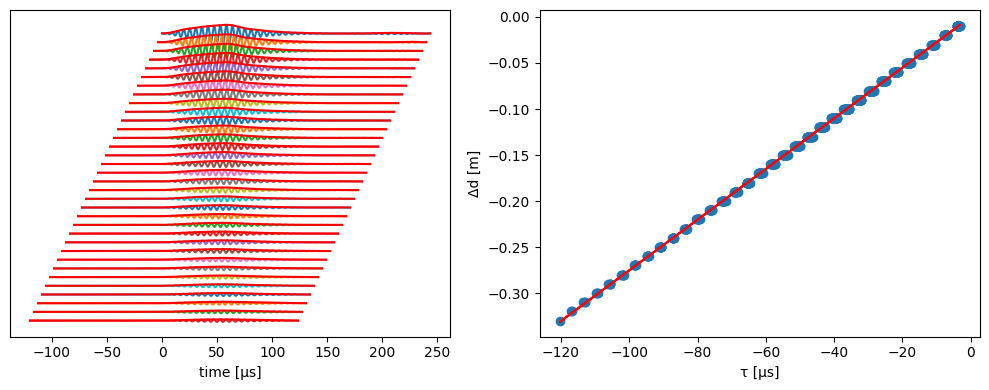

[ 2.75262240e+03 -2.26185556e-05  9.99806127e-01]


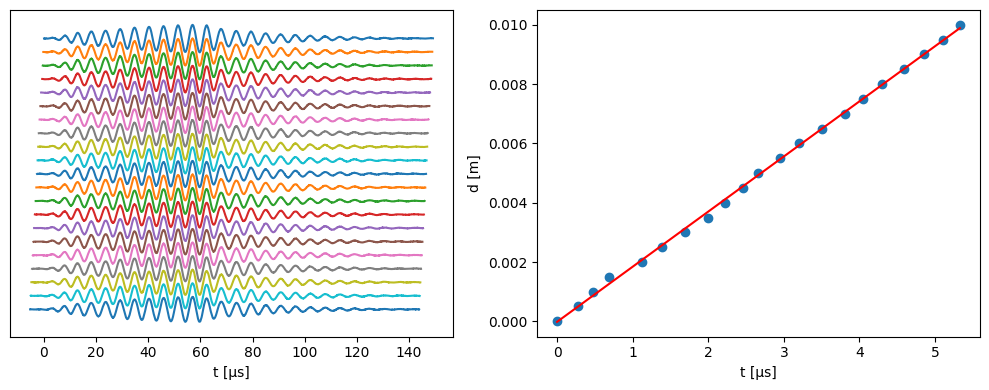

[ 1.85985024e+03 -1.87812304e-05  9.99015957e-01]
179038.07035053373


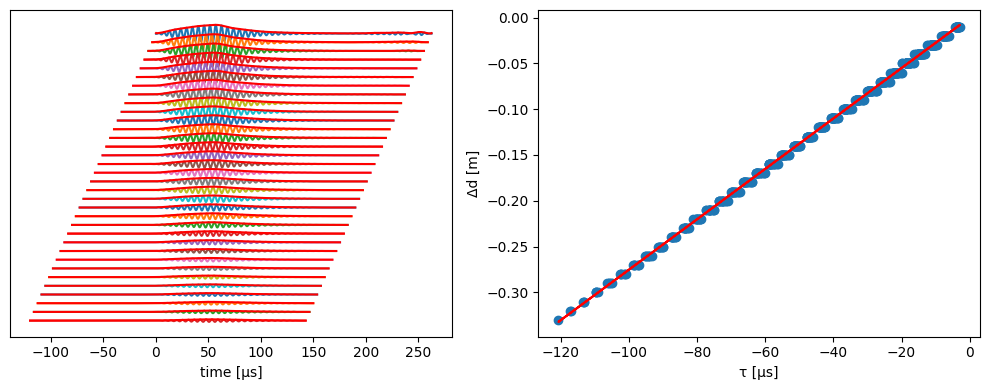

[ 2.75143231e+03 -6.37899913e-05  9.99453229e-01]


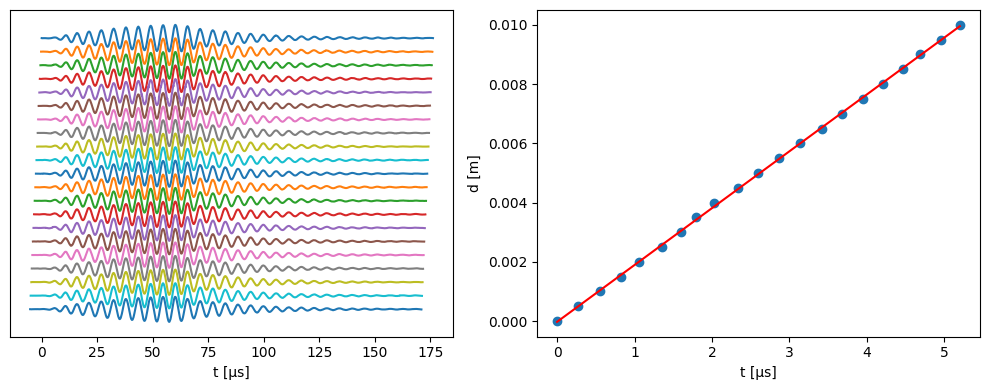

[ 1.92007378e+03 -2.91608114e-05  9.99688336e-01]


In [ ]:
print(max_frecuency(data_file[names[0]]))
print(threshold_group_velocity_all(data_file[names[0]], dist_vg, bp_w = 100e3, plot = True))
print(cc_phase_velocity(data_file[names[2]], dist_vf, short_step_start = 0, plot = True))

print(max_frecuency(data_file[names[1]]))
print(threshold_group_velocity_all(data_file[names[1]], dist_vg, bp_w = 100e3, plot = True))
print(cc_phase_velocity(data_file[names[3]], dist_vf, short_step_start = 0, plot = True))

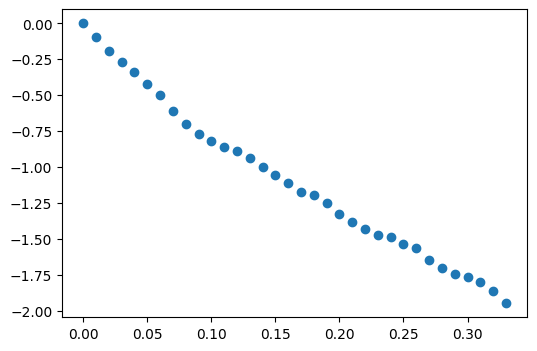

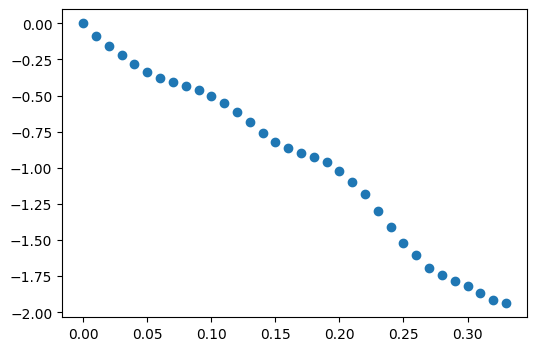

[-5.527 -5.98 ]
[0.985 0.984]


In [ ]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3])

for i in range(2):
    A = amplitudes(data_file[names[i]], dist_vg, bp_w = all_bp_width[i], plot = True)
    lr = linregress(dist_vg, np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

## Placa monocristalina

In [ ]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_monomod_0205.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(10, 10 * 33 + 0.01, 10))
dist_vg = np.array(inicio + paso_largo)*10**-3   #m

inicio = [0]
paso_corto = list(np.arange(0.5, 0.5 * 20 + 0.01, 0.5))
dist_vf = np.array(inicio + paso_corto)*10**-3   #m

print(names)

['fss_180kHz', 'fss_180kHz_T', 'fss_180kHz_vf', 'fss_180kHz_vf_T']


175818.09607753882


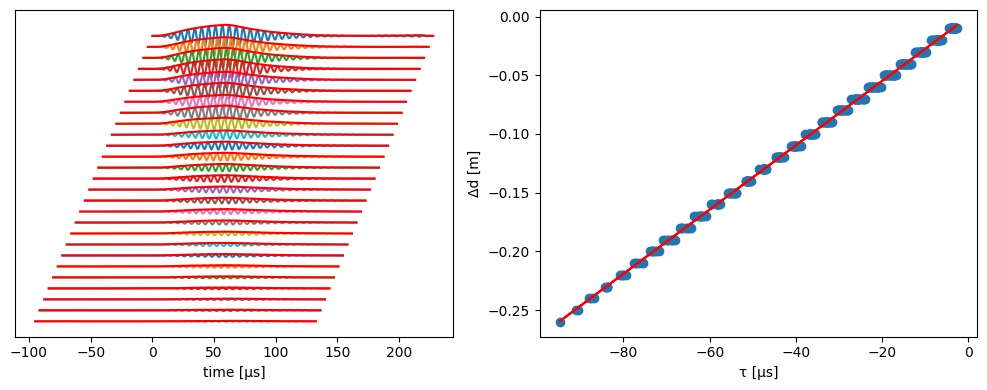

[ 2.73725820e+03 -8.07463953e-05  9.99134860e-01]


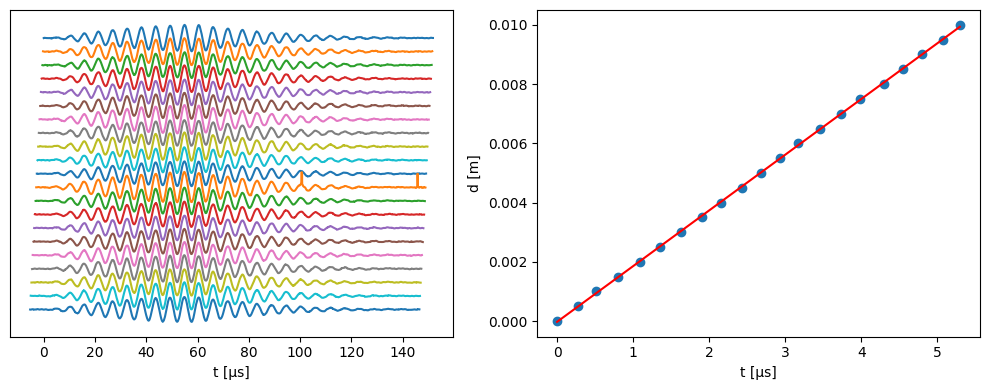

[ 1.88115867e+03 -2.75540312e-05  9.99830249e-01]
177683.67881061067


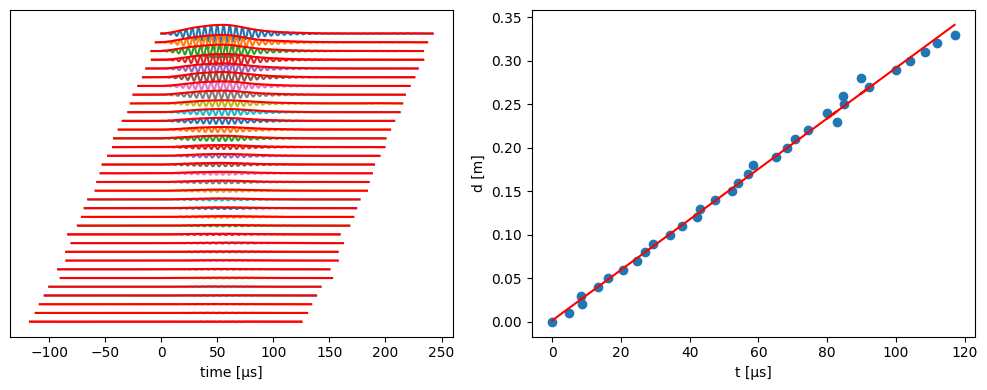

[2.90366209e+03 1.54825550e-03 9.96418029e-01]


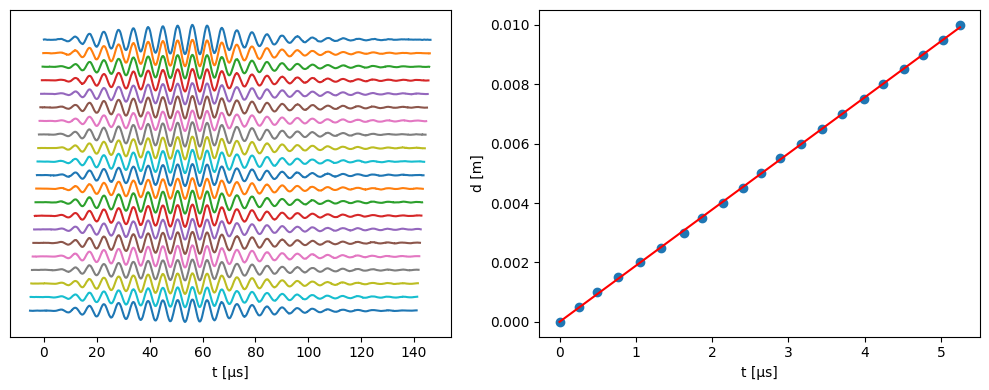

[ 1.89020969e+03 -1.34141220e-06  9.99849355e-01]


In [ ]:
import importlib, lambmath         # primera importación
importlib.reload(lambmath)

from lambmath import max_frecuency, threshold_group_velocity_all, cc_phase_velocity, threshold_group_velocity

print(max_frecuency(data_file[names[0]]))
print(threshold_group_velocity_all(data_file[names[0]], dist_vg, bp_w = 100e3, plot = True))
print(cc_phase_velocity(data_file[names[2]], dist_vf, short_step_start = 0, plot = True))

print(max_frecuency(data_file[names[1]]))
print(threshold_group_velocity(data_file[names[1]], dist_vg, bp_w = 60e3, plot = True, thr_frac = 0.9))
print(cc_phase_velocity(data_file[names[3]], dist_vf, short_step_start = 0, plot = True))

(27,)
(7110, 28)


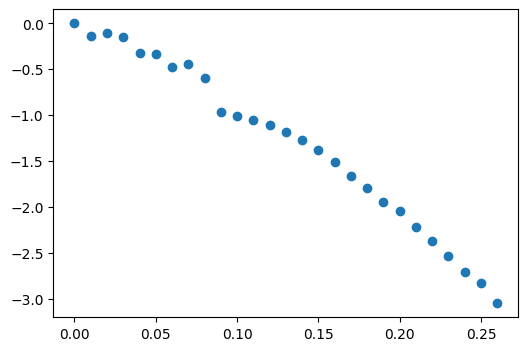

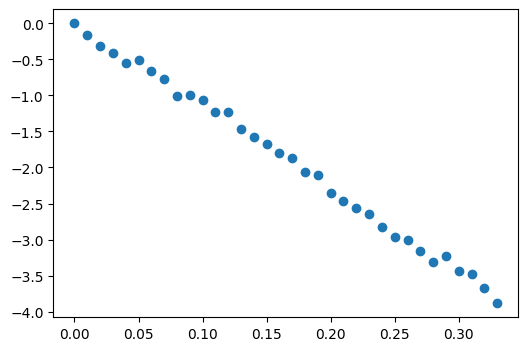

[-11.552 -11.521]
[0.983 0.997]


In [ ]:
print(dist_vg[:27].shape)
print(data_file[names[0]].shape)

from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = 100e3

A = amplitudes(data_file[names[0]], dist_vg[:27], bp_w = all_bp_width, plot = True)
lr = linregress(dist_vg[:27], np.log(A/A.max()))
alpha.append(lr[0])
r2.append(lr[2]**2)

A = amplitudes(data_file[names[1]], dist_vg, bp_w = all_bp_width, plot = True)
lr = linregress(dist_vg, np.log(A/A.max()))
alpha.append(lr[0])
r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

# Anisotropía

## Silicio

In [ ]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test2_ang_Si_1106.mat')
names = [i for i in data_file.keys()][3:]

theta = (np.linspace(0, 360, 181) + 10) * np.pi/180
print(names)

for name in names:
    data_file[name] = np.concatenate((data_file[name], data_file[name][:, 1:]), axis = 1)[0]

['fss_pk_ang_1MHz', 'fss_signal_ang_1MHz']


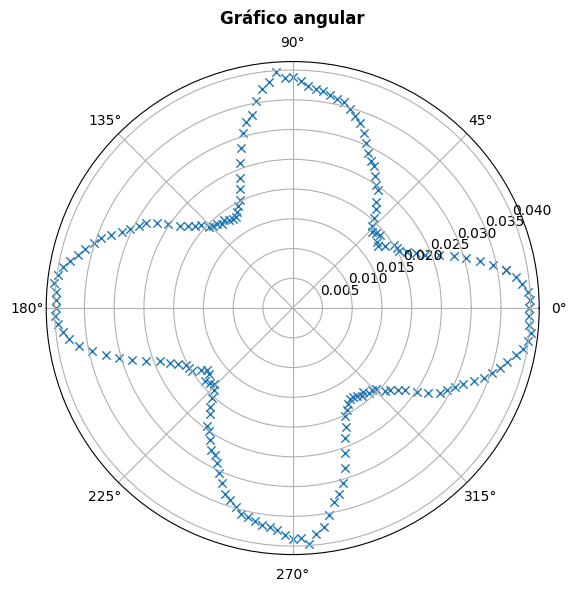

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

ax.scatter(theta, data_file[names[0]], marker = 'x', linewidths = 1)
ax.set_title('Gráfico angular', y = 1.06, fontweight = 'bold')
ax.grid(True)

plt.tight_layout()
plt.show()

## Célula N

In [ ]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test2_ang_0606.mat')
names = [i for i in data_file.keys()][3:]

theta = (np.linspace(0, 360, 181))*np.pi/180
print(names)

for name in names:
    data_file[name] = np.concatenate((data_file[name], data_file[name][:, 1:]), axis = 1)[0]

['fss_pk_ang_1MHz', 'fss_pk_wide_ang_1MHz', 'fss_signal_ang_1MHz', 'fss_signal_wide_ang_1MHz']


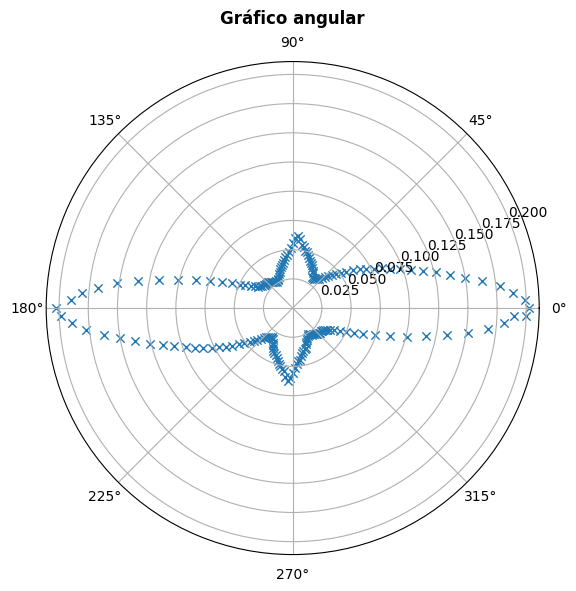

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

ax.scatter(theta, data_file[names[0]], marker = 'x', linewidths = 1)
ax.set_title('Gráfico angular', y = 1.06, fontweight = 'bold')
ax.grid(True)

plt.tight_layout()
plt.show()